In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=50

In [4]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
   "Rice Leafs",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2684 files belonging to 4 classes.


In [5]:
#folder names
class_names=dataset.class_names
class_names

['BrownSpot', 'Healthy', 'Hispa', 'LeafBlast']

In [6]:
len(dataset)

84

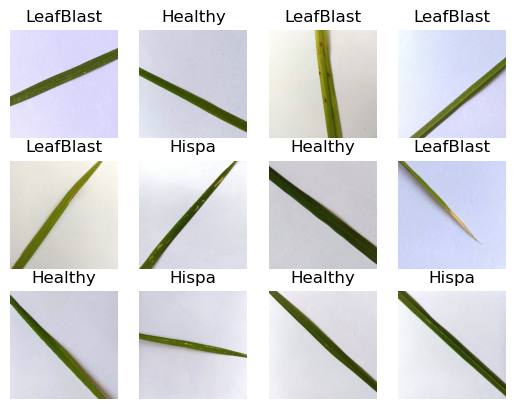

In [7]:
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
#print(image_batch[0].shape)
#print(label_batch.numpy())
#BrownSpot=0,Healthy=1,Hispa=2,LeafBlast=3

In [8]:
len(dataset)

84

In [9]:
#80% ==> training
#0% ==> validation
#10% ==> test

In [10]:
#training dataset
train_size=0.8
len(dataset)*train_size

67.2

In [11]:
train_ds=dataset.take(67)
len(train_ds)

67

In [12]:
#skipping the first 67
#testing dataset
test_ds=dataset.skip(67)
len(test_ds)

17

In [13]:
val_size=0.1
len(dataset)*val_size

8.4

In [14]:
#validation
val_ds=test_ds.take(8)
len(val_ds)


8

In [15]:
test_ds=test_ds.skip(8)
len(test_ds)

9

In [16]:
#splitting data set
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
        
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    
    train_ds=ds.take(train_size)
    
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)

    
    
    
    return train_ds,val_ds,test_ds

In [17]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset)

In [18]:
len(train_ds)

67

In [19]:
len(val_ds)

8

In [20]:
len(test_ds)

9

In [21]:
#GPU process
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [22]:
#preprocessing pipeline API
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1./255)
])

In [23]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [24]:
# Define model
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 4

model = tf.keras.models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=(None, IMAGE_SIZE, IMAGE_SIZE, CHANNELS))

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                 

In [26]:
# Compile model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [27]:
# Train the model
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50


67/67 [==============================] - 85s 1s/step - loss: 1.3144 - accuracy: 0.4407 - val_loss: 1.3129 - val_accuracy: 0.3984
Epoch 2/50
67/67 [==============================] - 74s 1s/step - loss: 1.2869 - accuracy: 0.4463 - val_loss: 1.3137 - val_accuracy: 0.3984
Epoch 3/50
67/67 [==============================] - 79s 1s/step - loss: 1.2968 - accuracy: 0.4463 - val_loss: 1.3377 - val_accuracy: 0.3984
Epoch 4/50
67/67 [==============================] - 69s 1s/step - loss: 1.2613 - accuracy: 0.4551 - val_loss: 1.2052 - val_accuracy: 0.4688
Epoch 5/50
67/67 [==============================] - 71s 1s/step - loss: 1.1875 - accuracy: 0.5009 - val_loss: 1.2324 - val_accuracy: 0.4375
Epoch 6/50
67/67 [==============================] - 71s 1s/step - loss: 1.1610 - accuracy: 0.5065 - val_loss: 1.2272 - val_accuracy: 0.4609
Epoch 7/50
67/67 [==============================] - 67s 1000ms/step - loss: 1.1433 - accuracy: 0.5103 - val_loss: 1.2242 - val_accuracy: 0.4648
Epoch 8/50
67/

In [28]:
scores=model.evaluate(test_ds)

9/9 [==============================] - 9s 199ms/step - loss: 0.5983 - accuracy: 0.7778


In [29]:
scores

[0.5983492136001587, 0.7777777910232544]

In [30]:
history

In [31]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 67}

In [32]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [33]:
history.history['accuracy']

[0.4406542181968689,
 0.4462616741657257,
 0.4462616741657257,
 0.4551401734352112,
 0.5009346008300781,
 0.5065420269966125,
 0.5102803707122803,
 0.517756998538971,
 0.5056074857711792,
 0.5172896981239319,
 0.5752336382865906,
 0.5733644962310791,
 0.6014018654823303,
 0.5953270792961121,
 0.6065420508384705,
 0.6060747504234314,
 0.6056074500083923,
 0.6112149357795715,
 0.6168224215507507,
 0.6172897219657898,
 0.6074766516685486,
 0.6205607652664185,
 0.6219626069068909,
 0.6172897219657898,
 0.6257009506225586,
 0.6149532794952393,
 0.5897196531295776,
 0.6121495366096497,
 0.622897207736969,
 0.6257009506225586,
 0.6261682510375977,
 0.6313084363937378,
 0.6345794200897217,
 0.6350467205047607,
 0.6719626188278198,
 0.6827102899551392,
 0.6981308460235596,
 0.6976635456085205,
 0.7084112167358398,
 0.7186915874481201,
 0.7168224453926086,
 0.7271028161048889,
 0.7294392585754395,
 0.7168224453926086,
 0.7425233721733093,
 0.7476635575294495,
 0.7495326995849609,
 0.746728956699

In [34]:
len(history.history['accuracy'])

50

In [35]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

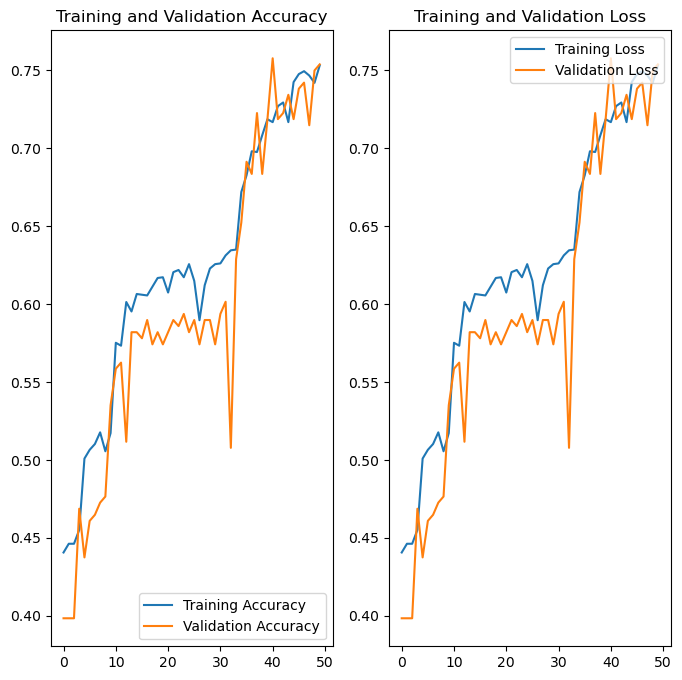

In [37]:
#plotting accuracy
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),acc,label='Training Loss')
plt.plot(range(EPOCHS),val_acc,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [49]:
np.argmax([0.72362715,0.001485,0.0223963,0.25249153])

NameError: name 'np' is not defined

first image to predict
actual label: BrownSpot
1/1 [==============================] - 0s 377ms/step
predicted label: BrownSpot


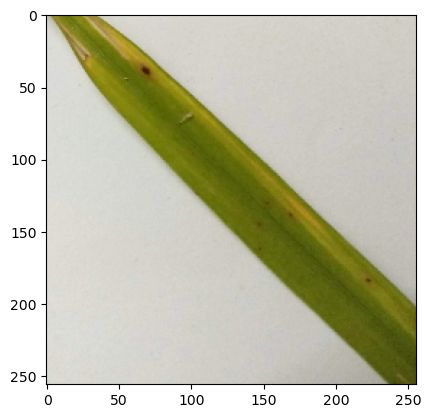

In [50]:
import numpy as np
for image_batch,label_batch in test_ds.take(1):
    
    first_image=image_batch[0].numpy().astype('uint8')
    first_label=label_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction=model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [51]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array,0)
    
    predictions = model.predict(img_array)
    
    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence

1/1 [==============================] - 0s 63ms/step


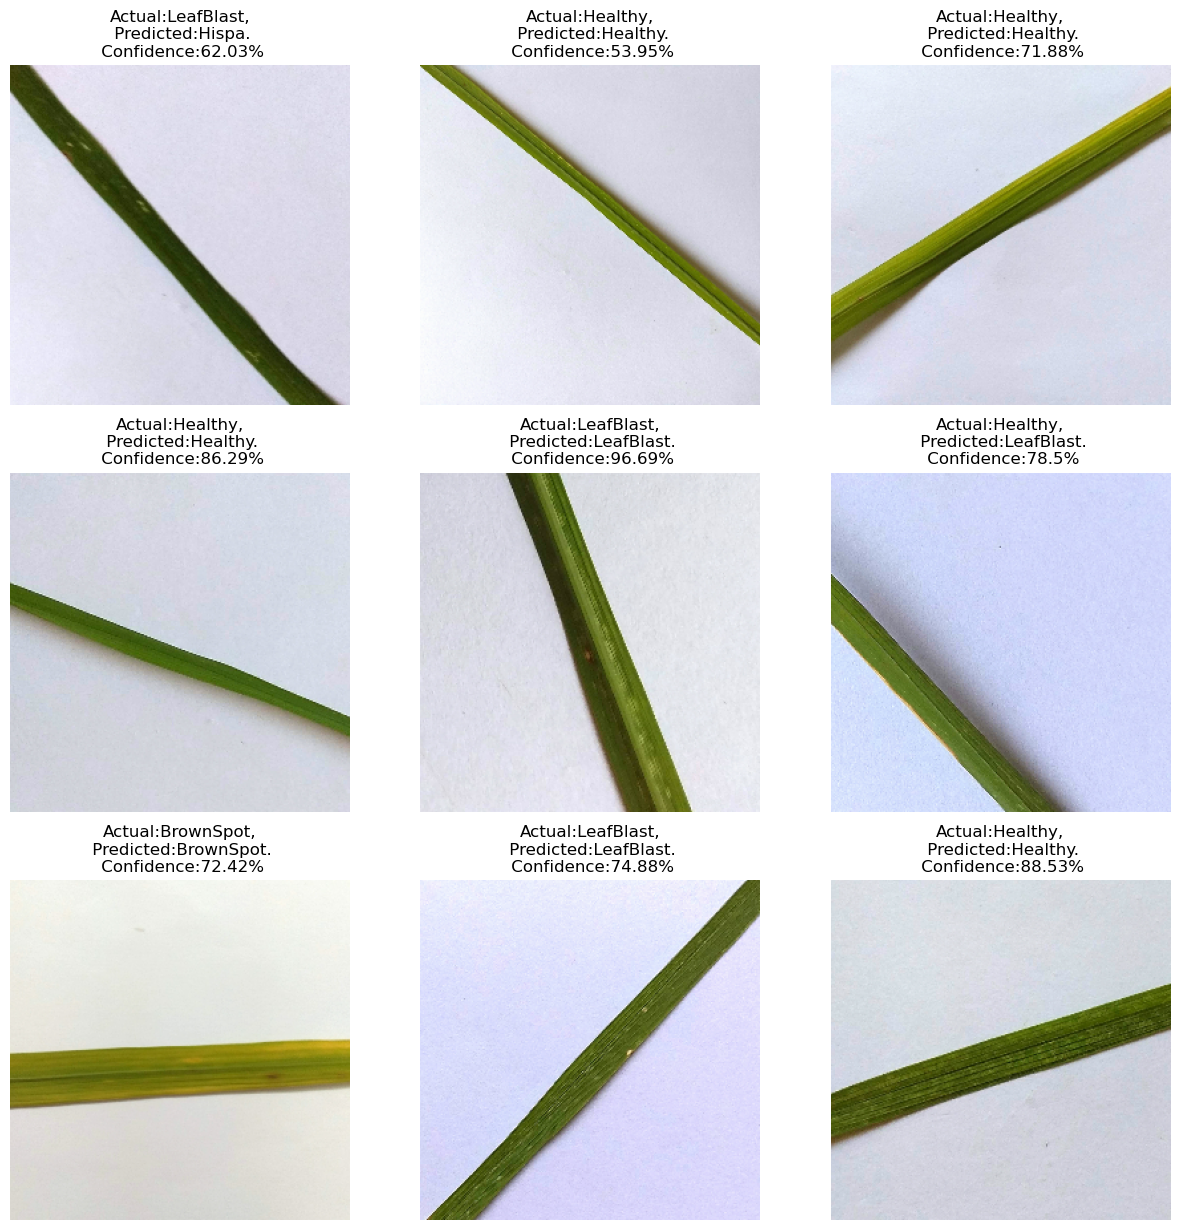

In [55]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class,confidence=predict(model,images[i].numpy())
        actual_class=class_names[labels[i]]
        
        plt.title(f"Actual:{actual_class},\n Predicted:{predicted_class}.\n Confidence:{confidence}%")
        
        plt.axis("off")

In [56]:
model_version=1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/1\assets


INFO:tensorflow:Assets written to: ../models/1\assets
